In [85]:
pip install --upgrade imblearn

     |████████████████████████████████| 189 kB 656 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [86]:
pip install glove_python

     |████████████████████████████████| 263 kB 561 kB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Users/mohammedalzabyedi/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/ys/cvv5cn5s157gp0p_6vlbtx040000gn/T/pip-install-ek08tr3y/glove-python_96ddcdb52c8647f99162109da6c05d54/setup.py'"'"'; __file__='"'"'/private/var/folders/ys/cvv5cn5s157gp0p_6vlbtx040000gn/T/pip-install-ek08tr3y/glove-python_96ddcdb52c8647f99162109da6c05d54/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/ys/cvv5cn5s157gp0p_6vlbtx040000gn/T/pip-wheel-vxo1010k
       cwd: /private/var/folders/ys/cvv5cn5s157gp0p_6vlbtx040000gn/T/pip-install-ek08tr3y/glove-python_96ddcdb52c8647f99162109da6c05d54/
  Complete output (16 lines):
  running bdist_wheel
  running build
  running bui

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
import matplotlib.cm as cm
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from scipy import stats
from scipy.stats import norm, skew

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [54]:
df= pd.read_csv('arabica_data_cleaned.csv')

In [55]:
df

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.00,2200.00,2000.00
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1307,Arabica,juan carlos garcia lopez,Mexico,el centenario,NaN,"la esperanza, municipio juchique de ferrer, ve...",1104328663,terra mia,900,juchique de ferrer,JUAN CARLOS GARCÍA LOPEZ,12,1 kg,AMECAFE,2012,"September 17th, 2012",JUAN CARLOS GARCIA LOPEZ,Bourbon,Washed / Wet,7.08,6.83,6.25,7.42,7.25,6.75,10.00,0.00,10.00,6.75,68.33,0.11,0,0.0,None,20,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.00,900.00,900.00
1307,1308,Arabica,myriam kaplan-pasternak,Haiti,200 farms,NaN,coeb koperativ ekselsyo basen (350 members),NaN,haiti coffee,~350m,"department d'artibonite , haiti",COEB Koperativ Ekselsyo Basen,1,2 kg,Specialty Coffee Association,2012,"May 24th, 2012",Myriam Kaplan-Pasternak,Typica,Natural / Dry,6.75,6.58,6.42,6.67,7.08,6.67,9.33,6.00,6.00,6.42,67.92,0.14,8,0.0,Blue-Green,16,"May 24th, 2013",

In [56]:
df1= pd.read_csv('merged_data_cleaned.csv')

In [57]:
df1

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,"san juan, playas",Café Robusta del Ecuador S.A.,1,2 kg,Specialty Coffee Association,2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,"san juan, playas",Café Robusta del Ecuador S.A.,1,2 kg,Specialty Coffee Association,2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336

In [58]:
frames = [df, df1]

result = pd.concat(frames)

In [60]:
result

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,"san juan, playas",Café Robusta del Ecuador S.A.,1,2 kg,Specialty Coffee Association,2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,"san juan, playas",Café Robusta del Ecuador S.A.,1,2 kg,Specialty Coffee Association,2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336

In [61]:
Data=result

In [62]:
pd.set_option('display.max_columns', None)
result.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [63]:
result.corr

<bound method DataFrame.corr of       Unnamed: 0  Species                     Owner Country.of.Origin  \
0              1  Arabica                 metad plc          Ethiopia   
1              2  Arabica                 metad plc          Ethiopia   
2              3  Arabica  grounds for health admin         Guatemala   
3              4  Arabica       yidnekachew dabessa          Ethiopia   
4              5  Arabica                 metad plc          Ethiopia   
...          ...      ...                       ...               ...   
1334        1334  Robusta               luis robles           Ecuador   
1335        1335  Robusta               luis robles           Ecuador   
1336        1336  Robusta               james moore     United States   
1337        1337  Robusta             cafe politico             India   
1338        1338  Robusta             cafe politico           Vietnam   

                                     Farm.Name Lot.Number            Mill  \
0             

In [64]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2650 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2650 non-null   int64  
 1   Species                2650 non-null   object 
 2   Owner                  2636 non-null   object 
 3   Country.of.Origin      2648 non-null   object 
 4   Farm.Name              1935 non-null   object 
 5   Lot.Number             546 non-null    object 
 6   Mill                   2022 non-null   object 
 7   ICO.Number             2347 non-null   object 
 8   Company                2232 non-null   object 
 9   Altitude               2201 non-null   object 
 10  Region                 2534 non-null   object 
 11  Producer               2188 non-null   object 
 12  Number.of.Bags         2650 non-null   int64  
 13  Bag.Weight             2650 non-null   object 
 14  In.Country.Partner     2650 non-null   object 
 15  Harv

In [12]:
result.describe()

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,2650.000000,2650.000000,2650.000000,2650.00000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2648.000000,2650.000000,2193.000000,2193.000000,2193.000000
mean,662.569057,154.036981,7.565272,7.51926,7.399408,7.534423,7.517611,7.517762,9.834143,9.834125,9.879736,7.500649,82.102751,0.088619,0.453208,0.175227,3.573962,1755.080772,1804.041662,1779.561217
std,382.686554,129.837420,0.378039,0.39913,0.404715,0.380635,0.364667,0.407569,0.556842,0.767473,0.575862,0.473950,3.507458,0.048116,2.223684,0.836162,5.330313,8716.233549,8715.586689,8715.411479
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,331.250000,14.000000,7.420000,7.33000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,662.500000,175.000000,7.580000,7.58000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,993.750000,275.000000,7.750000,7.75000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1338.000000,1062.000000,8.750000,8.83000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [13]:
result.isnull().sum()

Unnamed: 0                  0
Species                     0
Owner                      14
Country.of.Origin           2
Farm.Name                 715
Lot.Number               2104
Mill                      628
ICO.Number                303
Company                   418
Altitude                  449
Region                    116
Producer                  462
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               94
Grading.Date                0
Owner.1                    14
Variety                   427
Processing.Method         322
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers   

In [14]:
result = result.drop(['Lot.Number','Unnamed: 0','In.Country.Partner'],axis=1)

In [15]:
result['Company'].isna().sum()


418

In [16]:
result['Company'].mode()


0    unex guatemala, s.a.
dtype: object

In [17]:
result['Country.of.Origin'].isna().sum()

2

In [18]:
result = result[result['Country.of.Origin'].notna()]
result

,Species,Owner,Country.of.Origin,Farm.Name,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,metad plc,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,luis robles,Ecuador,robustasa,our own lab,NaN,robustasa,NaN,"san juan, playas",Café Robusta del Ecuador S.A.,1,2 kg,2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,Robusta,luis robles,Ecuador,robustasa,own laboratory,NaN,robustasa,40,"san juan, playas",Café Robusta del Ecuador S.A.,1,2 kg,2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,Robusta,james moore,United States,fazenda cazengo,cafe cazengo,NaN,global opportunity fund,795 meters,"kwanza norte province, angola",Cafe Cazengo,1,1 kg,2014,"December 23rd, 2014",James Moore,NaN,Natural / Dry,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00,0,0.0,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff

In [19]:
result = result.drop(['Farm.Name','Mill','ICO.Number','Company','Altitude','Producer'],axis=1)

In [20]:
result

,Species,Owner,Country.of.Origin,Region,Number.of.Bags,Bag.Weight,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,guji-hambela,300,60 kg,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,guji-hambela,300,60 kg,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,NaN,5,1,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,oromia,320,60 kg,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,guji-hambela,300,60 kg,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,luis robles,Ecuador,"san juan, playas",1,2 kg,2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,Robusta,luis robles,Ecuador,"san juan, playas",1,2 kg,2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,Robusta,james moore,United States,"kwanza norte province, angola",1,1 kg,2014,"December 23rd, 2014",James Moore,NaN,Natural / Dry,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00,0,0.0,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,Robusta,cafe politico,India,NaN,1,5 lbs,2013,"August 25th, 2014",Cafe Politico,NaN,Natural / Dry,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10,20,0.0,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [21]:
result= result.drop(['Number.of.Bags','Bag.Weight'],axis=1)

In [22]:
result

,Species,Owner,Country.of.Origin,Region,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,guji-hambela,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,guji-hambela,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,NaN,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,oromia,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,guji-hambela,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,luis robles,Ecuador,"san juan, playas",2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,Robusta,luis robles,Ecuador,"san juan, playas",2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,Robusta,james moore,United States,"kwanza norte province, angola",2014,"December 23rd, 2014",James Moore,NaN,Natural / Dry,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00,0,0.0,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,Robusta,cafe politico,India,NaN,2013,"August 25th, 2014",Cafe Politico,NaN,Natural / Dry,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10,20,0.0,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [23]:
result.loc[result["Harvest.Year"] == "2017 / 2018", "Harvest.Year"] = "2018"
result.loc[result["Harvest.Year"] == "2016 / 2017", "Harvest.Year"] = "2017"
result.loc[result["Harvest.Year"] == "2015/2016", "Harvest.Year"] = "2016"
result.loc[result["Harvest.Year"] == "2014/2015", "Harvest.Year"] = "2015"
result.loc[result["Harvest.Year"] == "2013/2014", "Harvest.Year"] = "2014"
result.loc[result["Harvest.Year"] == "2011/2012", "Harvest.Year"] = "2012"

In [24]:
result

,Species,Owner,Country.of.Origin,Region,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,guji-hambela,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,guji-hambela,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,NaN,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,oromia,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,guji-hambela,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,luis robles,Ecuador,"san juan, playas",2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,Robusta,luis robles,Ecuador,"san juan, playas",2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,Robusta,james moore,United States,"kwanza norte province, angola",2014,"December 23rd, 2014",James Moore,NaN,Natural / Dry,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00,0,0.0,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,Robusta,cafe politico,India,NaN,2013,"August 25th, 2014",Cafe Politico,NaN,Natural / Dry,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10,20,0.0,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [25]:
result = result[result['Harvest.Year'].notna()]
result

,Species,Owner,Country.of.Origin,Region,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,guji-hambela,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,guji-hambela,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,Arabica,yidnekachew dabessa,Ethiopia,oromia,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,guji-hambela,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
5,Arabica,ji-ae ahn,Brazil,NaN,2013,"September 3rd, 2013",Ji-Ae Ahn,NaN,Natural / Dry,8.58,8.42,8.42,8.50,8.25,8.33,10.00,10.00,10.00,8.33,88.83,0.11,0,0.0,Bluish-Green,1,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,luis robles,Ecuador,"san juan, playas",2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,Robusta,luis robles,Ecuador,"san juan, playas",2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,Robusta,james moore,United States,"kwanza norte province, angola",2014,"December 23rd, 2014",James Moore,NaN,Natural / Dry,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00,0,0.0,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,Robusta,cafe politico,India,NaN,2013,"August 25th, 2014",Cafe Politico,NaN,Natural / Dry,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10,20,0.0,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [26]:
result = result.drop(['Variety'],axis=1)


In [27]:
result

,Species,Owner,Country.of.Origin,Region,Harvest.Year,Grading.Date,Owner.1,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,guji-hambela,2014,"April 4th, 2015",metad plc,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,guji-hambela,2014,"April 4th, 2015",metad plc,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,Arabica,yidnekachew dabessa,Ethiopia,oromia,2014,"March 26th, 2015",Yidnekachew Dabessa,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,guji-hambela,2014,"April 4th, 2015",metad plc,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
5,Arabica,ji-ae ahn,Brazil,NaN,2013,"September 3rd, 2013",Ji-Ae Ahn,Natural / Dry,8.58,8.42,8.42,8.50,8.25,8.33,10.00,10.00,10.00,8.33,88.83,0.11,0,0.0,Bluish-Green,1,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,luis robles,Ecuador,"san juan, playas",2016,"January 19th, 2016",Luis Robles,NaN,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,Robusta,luis robles,Ecuador,"san juan, playas",2016,"January 19th, 2016",Luis Robles,NaN,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,Robusta,james moore,United States,"kwanza norte province, angola",2014,"December 23rd, 2014",James Moore,Natural / Dry,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00,0,0.0,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,Robusta,cafe politico,India,NaN,2013,"August 25th, 2014",Cafe Politico,Natural / Dry,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10,20,0.0,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


# EDA

If the altitude increases, acidity will decrease:

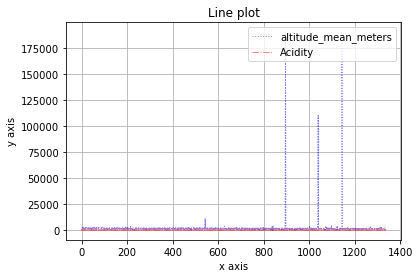

In [98]:
result.altitude_mean_meters.plot(kind = "line", color = "Blue", label = "altitude_mean_meters", linewidth = 1, alpha = 0.5, grid = True , linestyle = ":")
result.Acidity.plot(color = "red", label = "Acidity", linewidth = 1, alpha = 0.5, grid = True , linestyle = "-.")
plt.legend(loc = "upper right")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line plot")
plt.show()

Top coffee producing countries

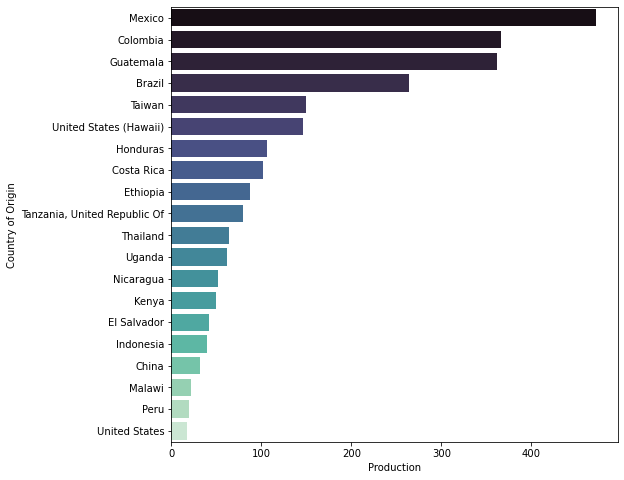

In [118]:
cdf = result.groupby("Country.of.Origin").size().reset_index(name="Harvest.Year") \
    .sort_values("Harvest.Year", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
ch_ = sns.barplot(x="Harvest.Year", y="Country.of.Origin", data=cdf,palette=('mako'), ax=ax)
ch_ = ax.set(xlabel="Production", ylabel="Country of Origin")

In [123]:
result.groupby(['Country.of.Origin','Harvest.Year'])

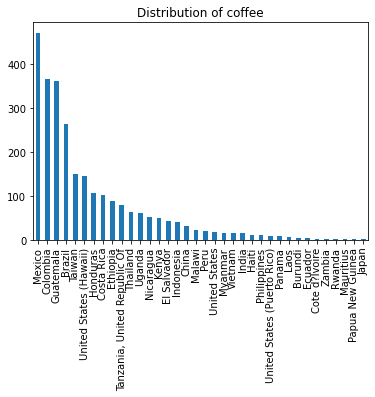

In [129]:
result['Country.of.Origin'].value_counts().plot(kind='bar', title= 'Distribution of coffee' ,  rot=90);

In [29]:
result['Total.Cup.Points'].astype(int)


0       90
1       89
3       89
4       88
5       88
        ..
1334    78
1335    78
1336    77
1337    75
1338    73
Name: Total.Cup.Points, Length: 2556, dtype: int64

In [119]:
def grading_coffee(x):
    if x>=90:
        return 'premium'
    elif x>=80:
        return 'speciality'
    elif x>=70:
        return 'commercial+'
    elif x>=60:
        return "commercial"
    else:
        return 'rejected'
    

In [120]:
#result=result.rename(columns={'Total.Cup.Points':'Total_Cup_Points'}, inplace=True)
#result.columns[18] = "Total_Cup_Points"
result1 = result.rename(columns={'Total.Cup.Points': 'Total_Cup_Points'})

In [121]:
result1

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total_Cup_Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,0,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,"san juan, playas",Café Robusta del Ecuador S.A.,1,2 kg,Specialty Coffee Association,2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,"san juan, playas",Café Robusta del Ecuador S.A.,1,2 kg,Specialty Coffee Association,2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1

In [65]:
result1['coffee_grade']=result1.Total_Cup_Points.apply(grading_coffee)

In [66]:
result1

,Species,Owner,Country.of.Origin,Region,Harvest.Year,Grading.Date,Owner.1,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total_Cup_Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,coffee_grade
0,Arabica,metad plc,Ethiopia,guji-hambela,2014,"April 4th, 2015",metad plc,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,premium
1,Arabica,metad plc,Ethiopia,guji-hambela,2014,"April 4th, 2015",metad plc,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,speciality
3,Arabica,yidnekachew dabessa,Ethiopia,oromia,2014,"March 26th, 2015",Yidnekachew Dabessa,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0,speciality
4,Arabica,metad plc,Ethiopia,guji-hambela,2014,"April 4th, 2015",metad plc,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,speciality
5,Arabica,ji-ae ahn,Brazil,NaN,2013,"September 3rd, 2013",Ji-Ae Ahn,Natural / Dry,8.58,8.42,8.42,8.50,8.25,8.33,10.00,10.00,10.00,8.33,88.83,0.11,0,0.0,Bluish-Green,1,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN,speciality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,luis robles,Ecuador,"san juan, playas",2016,"January 19th, 2016",Luis Robles,NaN,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN,commercial+
1335,Robusta,luis robles,Ecuador,"san juan, playas",2016,"January 19th, 2016",Luis Robles,NaN,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0,commercial+
1336,Robusta,james moore,United States,"kwanza norte province, angola",2014,"December 23rd, 2014",James Moore,Natural / Dry,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00,0,0.0,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0,commercial+
1337,Robusta,cafe politico,India,NaN,2013,"August 25th, 2014",Cafe Politico,Natural / Dry,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10,20,0.0,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN,commercial+


In [67]:
result1.groupby(['coffee_grade','Total_Cup_Points'])



In [68]:
result1['coffee_grade'].value_counts()

speciality     2196
commercial+     342
commercial       12
rejected          4
premium           2
Name: coffee_grade, dtype: int64

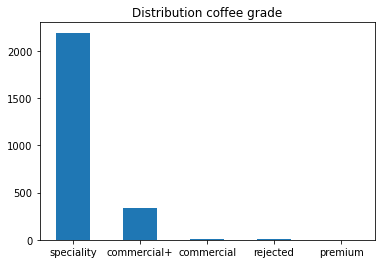

In [69]:
result1['coffee_grade'].value_counts().plot(kind='bar', title= 'Distribution coffee grade' ,  rot=0);

In [38]:
''''
df_train,df_test=train_test_split(result1, test_size=.2, random_state=199)

''''


SyntaxError: EOL while scanning string literal (<ipython-input-38-da2fedf4264a>, line 4)

In [39]:
result1.dtypes


Species                   object
Owner                     object
Country.of.Origin         object
Region                    object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total_Cup_Points         float64
Moisture                 float64
Category.One.Defects       int64
Quakers                  float64
Color                     object
Category.Two.Defects       int64
Expiration                object
Certification.Body        object
Certification.Address     object
Certification.Contact     object
unit_of_measurement       object
altitude_low_meters      float64
altitude_h

In [40]:
df_train,df_test=train_test_split(result1, test_size=.2, random_state=199)

In [41]:
X_train = df_train.loc[:,['Aroma', 'Flavor', 'Aftertaste','Acidity'
                          ,'Body','Balance','Uniformity','Clean.Cup',
                          'Sweetness','Cupper.Points']]

y_train = df_train['coffee_grade']

In [42]:
''''
result1['Aroma', 'Flavor', 'Aftertaste','Acidity'
                          'Body','Balance','Uniformity','Clean.Cup',
                          'Sweetness','Cupper.Points'].astype(int)
''''

SyntaxError: EOL while scanning string literal (<ipython-input-42-bc46b6ecc346>, line 5)

In [ ]:
'''kf = KFold(n_splits=5, shuffle=True, random_state=None) 
cv_lm_r2s, cv_lm_reg_r2s = [], []
for train_index, test_index in kf.split(X_train,y_train):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = y_train[train_index], y_train[test_index]
    lm = LogisticRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')'''

In [ ]:
''''kf = KFold(n_splits=5, shuffle=True, random_state = 199)
cv_lm_r2s, cv_lm_reg_r2s = [], []
''''

In [43]:
df_train,df_val = train_test_split(df_train, test_size=.2, random_state=199)


In [44]:
df_train.shape

(1635, 33)

In [45]:
df_test.shape

(512, 33)

In [46]:
df_val.shape

(409, 33)

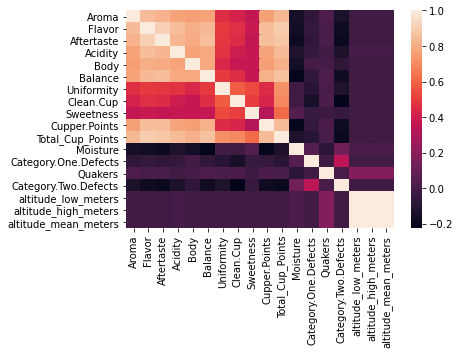

In [47]:
sns.heatmap(df_train.corr());


# Model


In [130]:
lm = LogisticRegression()

# Do the test 10 times with (unregularized) Logistic Regression and get the average score


In [131]:
lm.fit(X_train,y_train)
lm.score(X_train,y_train)

0.9094911937377691

In [132]:
decisiontree = DecisionTreeClassifier(max_depth=4)
decisiontree.fit(X_train,y_train)
decisiontree.score(X_train,y_train)

0.9711350293542075

In [133]:
X_val = df_val.loc[:,['Aroma', 'Flavor', 'Aftertaste','Acidity'
                          ,'Body','Balance','Uniformity','Clean.Cup',
                          'Sweetness','Cupper.Points']]

y_val = df_val['coffee_grade']

In [134]:
decisiontree.fit(X_val,y_val)
decisiontree.score(X_val,y_val)

0.9853300733496333

# Recall

In [135]:
result_train, result_test = train_test_split(result, test_size=0.2,random_state=0)

In [136]:
result_train.shape

(2120, 44)

# Cross Validation

In [137]:
x = df_val.loc[:,['Aroma', 'Flavor', 'Aftertaste','Acidity'
                          ,'Body','Balance','Uniformity','Clean.Cup',
                          'Sweetness','Cupper.Points']]
y = df_val['coffee_grade']

In [138]:
from collections import Counter
counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100 
    print(f"Class= {k}, n={v} ({dist}%)")

Class= speciality, n=351 (85.81907090464547%)
Class= commercial+, n=58 (14.180929095354522%)


<BarContainer object of 2 artists>

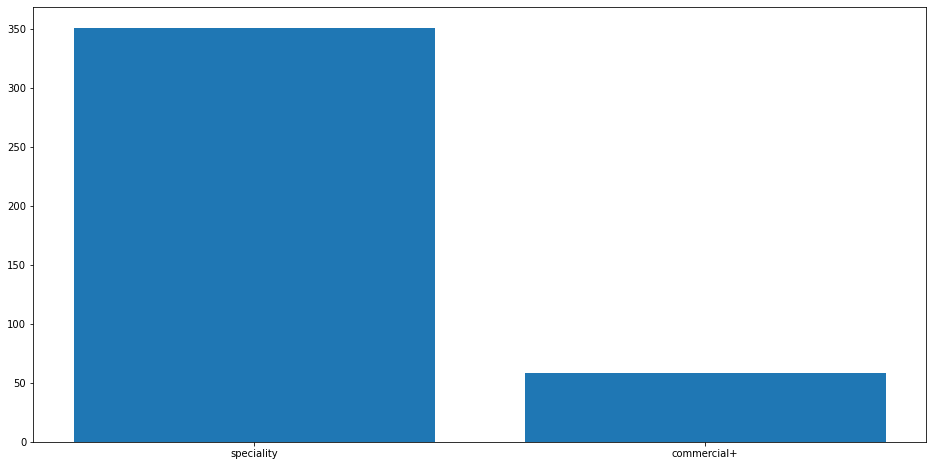

In [139]:
plt.figure(1, figsize=(16,8))
plt.bar(counter.keys(),counter.values())

# SMOTE

In [90]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = 0)
x, y = oversample.fit_resample(x, y)

In [91]:
from collections import Counter
counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100 
    print(f"Class= {k}, n={v} ({dist}%)")

Class= speciality, n=351 (50.0%)
Class= commercial+, n=351 (50.0%)


<BarContainer object of 2 artists>

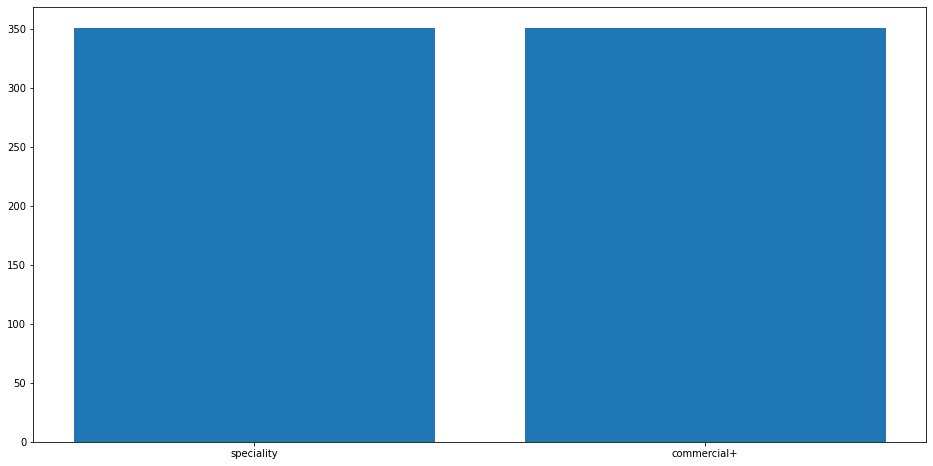

In [92]:
plt.figure(1, figsize=(16,8))
plt.bar(counter.keys(),counter.values())

# KNN

In [142]:
model1 = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(model1, x, y, cv=5, n_jobs=-1, scoring='f1_macro')
print(scores)

[0.91808192 0.95119048 0.8950064  0.92920863 0.91793313]


In [143]:
print(scores.mean())

0.9222841120227327
